# **Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

# **Merging Datasets**

In [ ]:
try:
    file1_path = '/content/test.csv'
    file2_path = '/content/sample_submission.csv'
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)
    common_column = 'ID'
    if common_column not in df1.columns or common_column not in df2.columns:
        raise KeyError("Column '{}' not found in both files.".format(common_column))
    merged_df = pd.merge(df1, df2, on=common_column)
    output_file = 'First.csv'
    merged_df.to_csv(output_file, index=False)
    print("Merging successful! Merged data saved in '{}'.".format(output_file))
except FileNotFoundError:
    print("File not found. Please check the file paths.")
except KeyError as ke:
    print(ke)
except Exception as e:
    print("An error occurred:", e)


Merging successful! Merged data saved in 'First.csv'.


In [ ]:
First = pd.read_csv('/content/First.csv')
First

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,0,0,0,0,0,0,1,0,...,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?,1
1,2,1,0,0,0,1,0,0,0,0,...,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent,1
2,3,1,0,0,1,0,1,0,1,0,...,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self,1
3,4,1,1,1,0,1,0,1,0,1,...,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative,1
4,5,1,0,0,1,1,0,0,1,1,...,f,White-European,no,no,Australia,no,10.717321,18 and more,Self,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1,0,0,0,0,0,1,0,0,...,f,South Asian,no,no,New Zealand,no,6.474056,18 and more,Self,1
196,197,1,1,1,0,1,0,0,0,1,...,f,White-European,no,yes,Brazil,no,9.114055,18 and more,Self,1
197,198,1,0,1,1,1,0,0,1,1,...,f,South Asian,yes,no,New Zealand,no,8.519987,18 and more,Self,1
198,199,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,no,United Kingdom,no,11.740482,18 and more,Self,1


In [ ]:
try:
    file1_path = '/content/train.csv'
    file2_path = '/content/First.csv'
    df1 = pd.read_csv(file1_path)
    df2 = pd.read_csv(file2_path)
    max_id = df1['ID'].max()
    df2.reset_index(drop=True, inplace=True)
    df2['ID'] += max_id
    combined_df = pd.concat([df1, df2], ignore_index=True)
    output_file = 'First_Data.csv'
    combined_df.to_csv(output_file, index=False)
    print("Combining successful! Combined data saved in '{}'.".format(output_file))
except FileNotFoundError:
    print("File not found. Please check the file paths.")
except Exception as e:
    print("An error occurred:", e)

Combining successful! Combined data saved in 'First_Data.csv'.


In [ ]:
First_Data = pd.read_csv('/content/First_Data.csv')
First_Data

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1,0,0,0,0,0,1,0,0,...,f,South Asian,no,no,New Zealand,no,6.474056,18 and more,Self,1
996,997,1,1,1,0,1,0,0,0,1,...,f,White-European,no,yes,Brazil,no,9.114055,18 and more,Self,1
997,998,1,0,1,1,1,0,0,1,1,...,f,South Asian,yes,no,New Zealand,no,8.519987,18 and more,Self,1
998,999,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,no,United Kingdom,no,11.740482,18 and more,Self,1


In [ ]:
Second_Data = pd.read_csv('/content/Toddler Autism dataset July 2018.csv')
Second_Data['Age'] = Second_Data['Age_Mons'] / 12
Second_Data.drop('Age_Mons', axis=1, inplace=True)
Second_Data['Class/ASD Traits '] = Second_Data['Class/ASD Traits '].replace({'No': 0, 'Yes': 1})

In [ ]:
print(First_Data.columns)
print(Second_Data.columns)

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')
Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits ', 'Age'],
      dtype='object')


In [ ]:
column_mapping = {
    'ID': 'Case_No',
    'A1_Score': 'A1',
    'A2_Score': 'A2',
    'A3_Score': 'A3',
    'A4_Score': 'A4',
    'A5_Score': 'A5',
    'A6_Score': 'A6',
    'A7_Score': 'A7',
    'A8_Score': 'A8',
    'A9_Score': 'A9',
    'A10_Score': 'A10',
    'age': 'Age',
    'gender': 'Sex',
    'ethnicity': 'Ethnicity',
    'jaundice': 'Jaundice',
    'Class/ASD': 'Class/ASD Traits '
}

First_Data_renamed = First_Data.rename(columns=column_mapping)
merged_data = pd.concat([First_Data_renamed, Second_Data], ignore_index=True)
common_columns = list(column_mapping.values())
merged_data = merged_data[common_columns]
merged_data=merged_data.drop('Case_No', axis=1)
merged_data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Sex', 'Ethnicity', 'Jaundice', 'Class/ASD Traits '],
      dtype='object')

In [ ]:
merged_data.head

<bound method NDFrame.head of       A1  A2  A3  A4  A5  A6  A7  A8  A9  A10        Age Sex       Ethnicity  \
0      1   0   1   1   1   1   0   1   1    1  18.605397   f  White-European   
1      0   0   0   0   0   0   0   0   0    1  13.829369   f     South Asian   
2      1   1   1   1   1   1   0   0   1    1  14.679893   f  White-European   
3      0   0   0   1   0   0   0   0   0    0  61.035288   f     South Asian   
4      0   0   0   0   1   0   0   0   1    1  14.256686   m           Black   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...        ...  ..             ...   
2049   0   0   0   0   0   0   0   0   0    1   2.000000   f  White European   
2050   0   0   1   1   1   0   1   0   1    0   1.000000   m           black   
2051   1   0   1   1   1   1   1   1   1    1   1.500000   m  middle eastern   
2052   1   0   0   0   0   0   0   1   0    1   1.583333   m  White European   
2053   1   1   0   0   1   1   0   1   1    0   2.000000   m           asian   

     Jaun

In [ ]:
merged_data.isnull().sum()

A1                   0
A2                   0
A3                   0
A4                   0
A5                   0
A6                   0
A7                   0
A8                   0
A9                   0
A10                  0
Age                  0
Sex                  0
Ethnicity            0
Jaundice             0
Class/ASD Traits     0
dtype: int64

In [ ]:
merged_data.duplicated().sum()

92

In [ ]:
# Drop duplicates
merged_data = merged_data.drop_duplicates()

# Check if duplicates have been removed
print(merged_data.duplicated().sum())


0


In [ ]:
merged_data.info
merged_data['Ethnicity'].unique()

array(['White-European', 'South Asian', 'Black', 'Asian',
       'Middle Eastern ', '?', 'others', 'Latino', 'Turkish', 'Others',
       'Hispanic', 'Pasifika', 'middle eastern', 'White European',
       'black', 'asian', 'south asian', 'Native Indian', 'mixed',
       'Pacifica'], dtype=object)

In [ ]:
merged_data['Ethnicity'].replace({
    'White-European': 'White European',
    'South Asian': 'south asian',
    'black': 'Black',
    'Asian': 'asian',
    '?': 'others'
}, inplace=True)

merged_data['Ethnicity'].unique()

<ipython-input-14-16fa542d20cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Ethnicity'].replace({


array(['White European', 'south asian', 'Black', 'asian',
       'Middle Eastern ', 'others', 'Latino', 'Turkish', 'Others',
       'Hispanic', 'Pasifika', 'middle eastern', 'Native Indian', 'mixed',
       'Pacifica'], dtype=object)

In [ ]:
merged_data.shape
merged_data.info()
merged_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 2053
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   A1                 1962 non-null   int64  
 1   A2                 1962 non-null   int64  
 2   A3                 1962 non-null   int64  
 3   A4                 1962 non-null   int64  
 4   A5                 1962 non-null   int64  
 5   A6                 1962 non-null   int64  
 6   A7                 1962 non-null   int64  
 7   A8                 1962 non-null   int64  
 8   A9                 1962 non-null   int64  
 9   A10                1962 non-null   int64  
 10  Age                1962 non-null   float64
 11  Sex                1962 non-null   object 
 12  Ethnicity          1962 non-null   object 
 13  Jaundice           1962 non-null   object 
 14  Class/ASD Traits   1962 non-null   int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 245.2+ KB


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Class/ASD Traits
count,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000,1962.000000
mean,0.579001,0.368502,0.362385,0.469419,0.494393,0.392457,0.468400,0.593782,0.405708,0.513761,15.647904,0.543833
std,0.493845,0.482521,0.480812,0.499191,0.500096,0.488422,0.499128,0.491251,0.491154,0.499938,15.951314,0.498202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,12.420377,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.592784,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.402488,1.000000


# **Visualization**

<Figure size 1000x600 with 0 Axes>

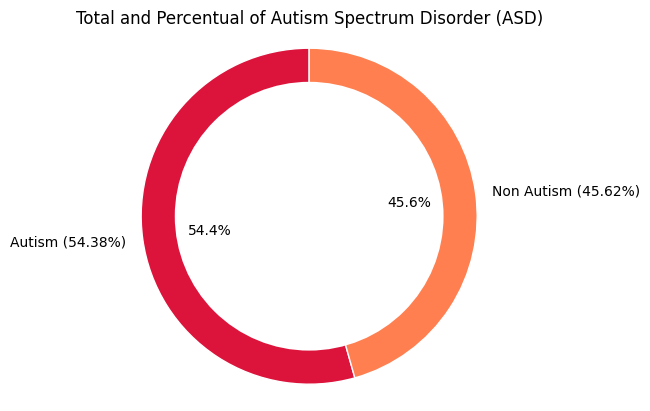

In [ ]:
autism_map = {1: 'Autism', 0: 'Non Autism'}
autism_colors = ['crimson', 'coral']
plt.figure(figsize=(10, 6))
total_count = len(merged_data)
autist_count = merged_data['Class/ASD Traits '].sum()
non_autist_count = total_count - autist_count
autist_percent = autist_count / total_count * 100
non_autist_percent = non_autist_count / total_count * 100
fig, ax = plt.subplots()
ax.pie([autist_percent, non_autist_percent], labels=[f'Autism ({autist_percent:.2f}%)', f'Non Autism ({non_autist_percent:.2f}%)'],
       autopct='%1.1f%%', startangle=90, colors=autism_colors, wedgeprops=dict(width=0.4, edgecolor='w'))
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title('Total and Percentual of Autism Spectrum Disorder (ASD)')
plt.show()

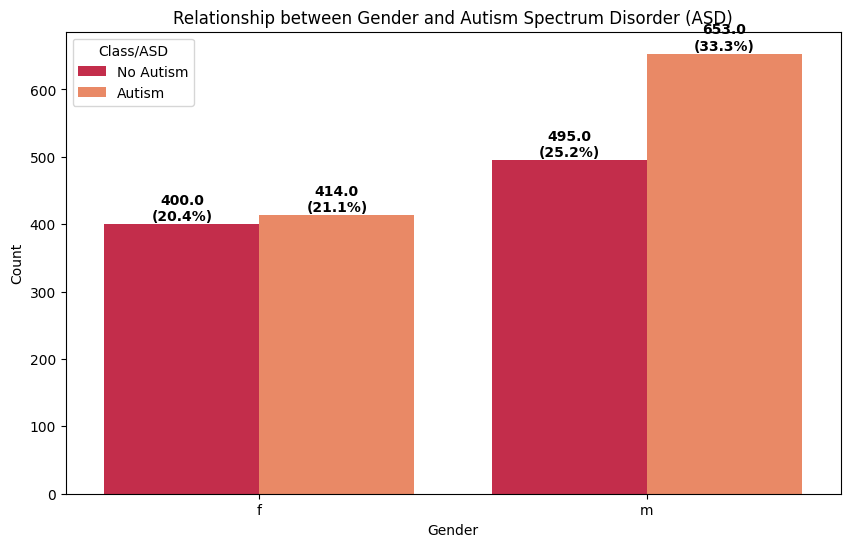

In [ ]:
class_colors = {0: 'crimson', 1: 'coral'}
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Sex', hue='Class/ASD Traits ', data=merged_data, palette=class_colors)
total_count = len(merged_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Relationship between Gender and Autism Spectrum Disorder (ASD)')
ax.legend(title='Class/ASD', labels=['No Autism', 'Autism'])
plt.show()

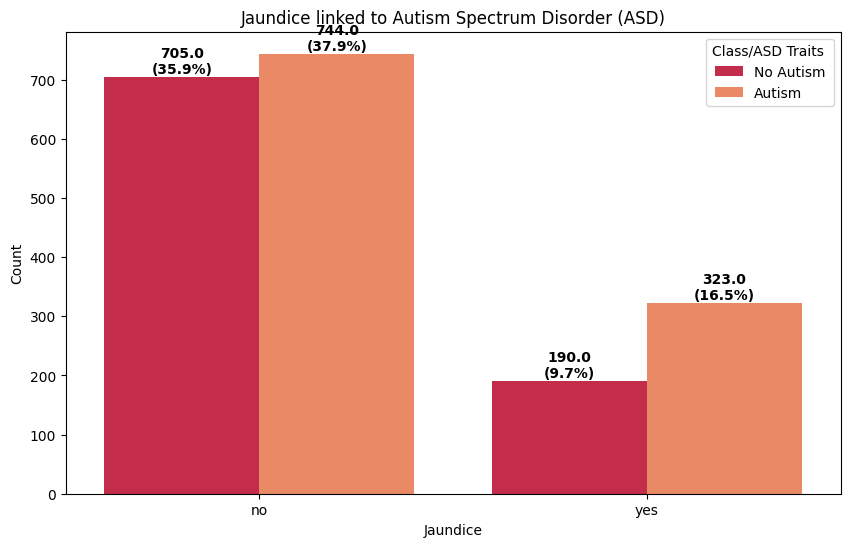

In [ ]:
jaundice_colors = ['crimson', 'coral']
jaundice_map = {'yes': 'Jaundice', 'no': 'No Jaundice'}
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Jaundice', hue='Class/ASD Traits ', data=merged_data, palette=jaundice_colors)
total_count = len(merged_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height}\n({height / total_count * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')
plt.xlabel('Jaundice')
plt.ylabel('Count')
plt.title('Jaundice linked to Autism Spectrum Disorder (ASD)')
ax.legend(title='Class/ASD Traits ', labels=['No Autism', 'Autism'])
plt.show()

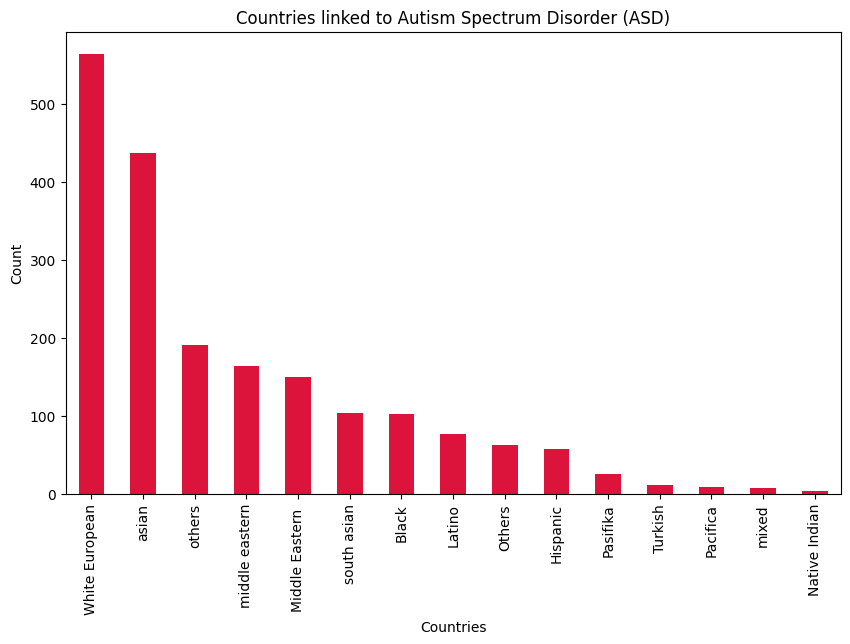

In [ ]:
plt.figure(figsize=(10, 6))
merged_data.Ethnicity.value_counts().plot(kind='bar',color='crimson')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Countries linked to Autism Spectrum Disorder (ASD)')
plt.show()

<ipython-input-20-8c576aa522c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = merged_data.corr()


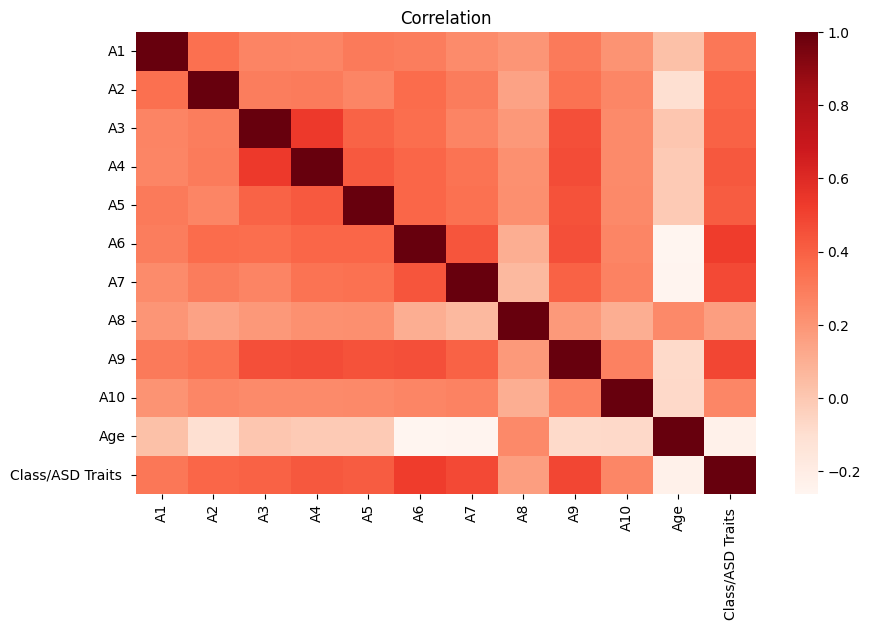

In [ ]:
correlation = merged_data.corr()
fig = plt.figure(figsize=(10, 6))
r = sns.heatmap(correlation, cmap="Reds")
r.set_title("Correlation")
plt.show()

# **PreProcessing**

In [ ]:
merged_data.dtypes

A1                     int64
A2                     int64
A3                     int64
A4                     int64
A5                     int64
A6                     int64
A7                     int64
A8                     int64
A9                     int64
A10                    int64
Age                  float64
Sex                   object
Ethnicity             object
Jaundice              object
Class/ASD Traits       int64
dtype: object

In [ ]:
merged_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Class/ASD Traits
0,1,0,1,1,1,1,0,1,1,1,18.605397,f,White European,no,0
1,0,0,0,0,0,0,0,0,0,1,13.829369,f,south asian,no,0
2,1,1,1,1,1,1,0,0,1,1,14.679893,f,White European,no,1
3,0,0,0,1,0,0,0,0,0,0,61.035288,f,south asian,no,0
4,0,0,0,0,1,0,0,0,1,1,14.256686,m,Black,no,0


In [ ]:
# Perform one-hot encoding for all categorical columns
categorical_columns = ['Sex', 'Ethnicity', 'Jaundice']  # categorical columns

# Extract categorical columns and perform one-hot encoding
merged_data = pd.get_dummies(merged_data, columns=categorical_columns, drop_first=True)

In [ ]:
merged_data.isna().sum()

A1                           0
A2                           0
A3                           0
A4                           0
A5                           0
A6                           0
A7                           0
A8                           0
A9                           0
A10                          0
Age                          0
Class/ASD Traits             0
Sex_m                        0
Ethnicity_Hispanic           0
Ethnicity_Latino             0
Ethnicity_Middle Eastern     0
Ethnicity_Native Indian      0
Ethnicity_Others             0
Ethnicity_Pacifica           0
Ethnicity_Pasifika           0
Ethnicity_Turkish            0
Ethnicity_White European     0
Ethnicity_asian              0
Ethnicity_middle eastern     0
Ethnicity_mixed              0
Ethnicity_others             0
Ethnicity_south asian        0
Jaundice_yes                 0
dtype: int64

In [ ]:
X = merged_data.drop('Class/ASD Traits ',axis=1)
y = merged_data['Class/ASD Traits ']

In [ ]:
# check class balance
y.value_counts()

1    1067
0     895
Name: Class/ASD Traits , dtype: int64

In [ ]:
# Undersampling
rus = RandomUnderSampler(sampling_strategy=1)
X_res, y_res = rus.fit_resample(X, y)

In [ ]:
y_res.value_counts()

0    895
1    895
Name: Class/ASD Traits , dtype: int64

In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [ ]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Cross Validation**

In [ ]:
def metrics(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')

    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


# Create a list of models
models = []
models.append(('LR', log_reg))
models.append(('KNN', knn))
models.append(('SVM', svm))
models.append(('RF', rf))
# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)

    print(f"{name} Train Accuracy:", round(accuracy_score(y_train, y_hat_train), 2))
    print(f"{name} Test Accuracy:", round(accuracy_score(y_test, y_hat_test), 2))
    metrics(name, y_test, y_hat_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Train Accuracy: 0.86
LR Test Accuracy: 0.81
LR - Accuracy: 0.81, Precision: 0.84, Recall: 0.77, F1 Score: 0.81
KNN Train Accuracy: 0.88
KNN Test Accuracy: 0.8
KNN - Accuracy: 0.80, Precision: 0.85, Recall: 0.75, F1 Score: 0.80
SVM Train Accuracy: 0.85
SVM Test Accuracy: 0.81
SVM - Accuracy: 0.81, Precision: 0.91, Recall: 0.70, F1 Score: 0.79
RF Train Accuracy: 0.88
RF Test Accuracy: 0.82
RF - Accuracy: 0.82, Precision: 0.86, Recall: 0.78, F1 Score: 0.82


In [ ]:
# Perform cross-validation for each model
for name, model in models:

    cv_scores = cross_val_score(model, X, y, cv=4)

    print(f"{name} Cross-Validation Scores:", cv_scores)

    avg_cv_score = cv_scores.mean()
    print(f"{name} Average Cross-Validation Score:", avg_cv_score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR Cross-Validation Scores: [0.72708758 0.74541752 0.90816327 0.78571429]
LR Average Cross-Validation Score: 0.7915956606675256
KNN Cross-Validation Scores: [0.52749491 0.75356415 0.83877551 0.85306122]
KNN Average Cross-Validation Score: 0.7432239494575834
SVM Cross-Validation Scores: [0.46843177 0.76578411 0.9122449  0.54489796]
SVM Average Cross-Validation Score: 0.672839685772476
RF Cross-Validation Scores: [0.71486762 0.75967413 0.90816327 0.78979592]
RF Average Cross-Validation Score: 0.793125233800241


# **Models**

# **Random Forest**

Train accuracy: 0.8754988028731046
Test accuracy: 0.8249534450651769


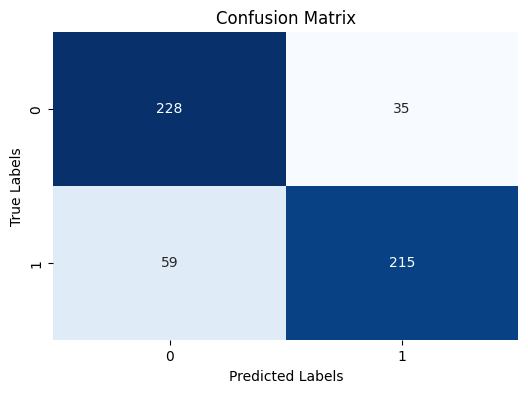

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       263
           1       0.86      0.78      0.82       274

    accuracy                           0.82       537
   macro avg       0.83      0.83      0.82       537
weighted avg       0.83      0.82      0.82       537



In [ ]:
# Before anything

from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier with specified hyperparameters
rf = RandomForestClassifier(n_estimators=90, max_depth=5, min_samples_split=2, random_state=42)
# You can adjust these hyperparameters as needed

# Fit the model
rf.fit(X_train_scaled, y_train)

# Evaluate model performance
train_accuracy = rf.score(X_train_scaled, y_train)
test_accuracy = rf.score(X_test_scaled, y_test)

# Predict labels for the test set
y_pred = rf.predict(X_test_scaled)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Train accuracy: 0.8858739026336792
Test accuracy: 0.8342644320297952


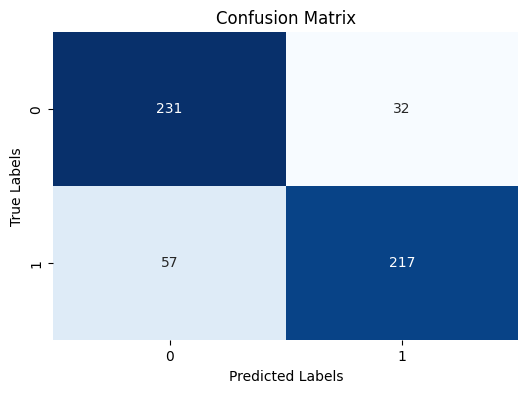

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       263
           1       0.87      0.79      0.83       274

    accuracy                           0.83       537
   macro avg       0.84      0.84      0.83       537
weighted avg       0.84      0.83      0.83       537



In [ ]:
# Hyperparameter Tuning

# Initialize RandomForestClassifier
rf_tuned = RandomForestClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [70, 80, 90, 100],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters found by the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate model performance with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train_scaled, y_train)
train_accuracy = best_rf.score(X_train_scaled, y_train)
test_accuracy = best_rf.score(X_test_scaled, y_test)

# Predict labels for the test set
y_pred = grid_search.predict(X_test_scaled)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


# **KNN**

Train accuracy: 0.8675179569034318
Test accuracy: 0.8063314711359404


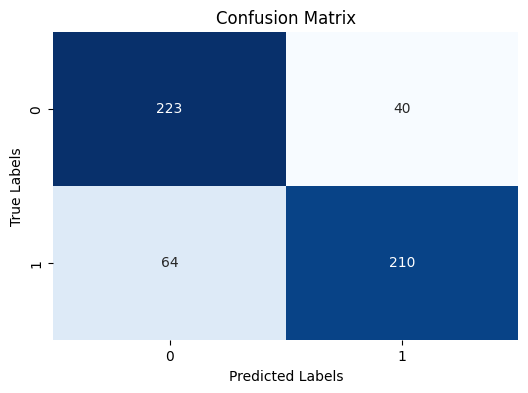

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       263
           1       0.84      0.77      0.80       274

    accuracy                           0.81       537
   macro avg       0.81      0.81      0.81       537
weighted avg       0.81      0.81      0.81       537



In [ ]:
# Before anything

from sklearn.neighbors import KNeighborsClassifier

# Define specific hyperparameters
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)

# Fit the model
knn.fit(X_train_scaled, y_train)

# Evaluate model performance
train_accuracy = knn.score(X_train_scaled, y_train)
test_accuracy = knn.score(X_test_scaled, y_test)

# Predict labels for the test set
y_pred = knn.predict(X_test_scaled)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Train accuracy: 0.8667198723064645
Test accuracy: 0.8100558659217877


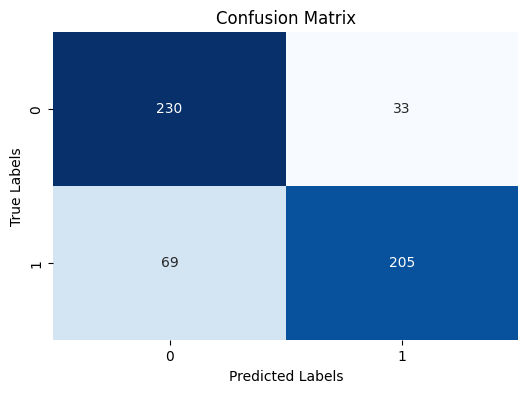

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       263
           1       0.86      0.75      0.80       274

    accuracy                           0.81       537
   macro avg       0.82      0.81      0.81       537
weighted avg       0.82      0.81      0.81       537



In [ ]:
# After Tuning

# Initialize KNeighborsClassifier
knn_tuned = KNeighborsClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 4, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=knn_tuned, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters found by the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate model performance with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)
train_accuracy = best_knn.score(X_train_scaled, y_train)
test_accuracy = best_knn.score(X_test_scaled, y_test)

# Predict labels for the test set
y_pred = grid_search.predict(X_test_scaled)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)



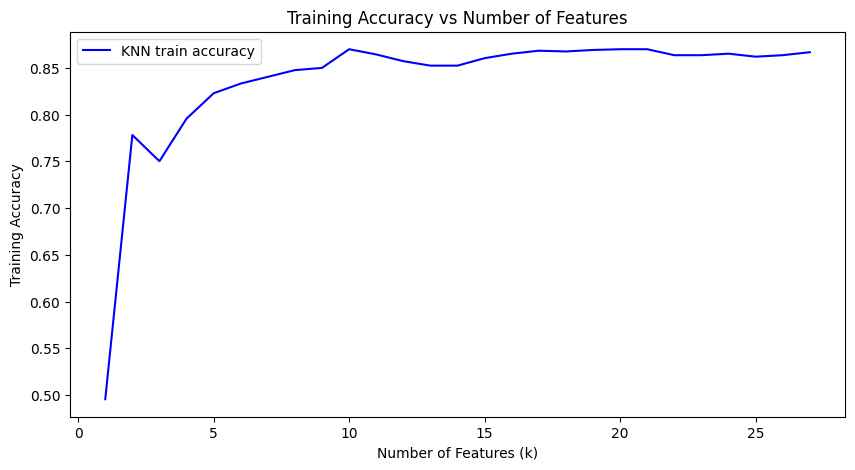

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

knn_selected = KNeighborsClassifier(n_neighbors= 7, p= 1, weights= 'uniform')

k_range = np.arange(1, 28, 1)

accuracy_list_train_knn = []

for kk in k_range:
    selector = SelectKBest(f_classif, k=kk)
    X_train_new = selector.fit_transform(X_train_scaled, y_train)

    knn_selected.fit(X_train_new, y_train)
    accuracy_list_train_knn.append(knn_selected.score(X_train_new, y_train))

plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracy_list_train_knn, color="blue", label="KNN train accuracy")
plt.xlabel("Number of Features (k)")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Number of Features")
plt.legend()
plt.show()

In [ ]:
d = {'best features number': kk, 'train_score': accuracy_list_train_knn}
df = pd.DataFrame(data=d)
print("max accuracy:",df["train_score"].max())
print("max accuracy id:",df["train_score"].idxmax())

max accuracy: 0.8699122106943336
max accuracy id: 9


In [ ]:
selector_knn = SelectKBest(f_classif, k = 9)
X_new_knn = selector_knn.fit_transform(X_train_scaled, y_train)
X_new_test_knn=selector_knn.fit_transform(X_test_scaled,y_test)
knn_selected = KNeighborsClassifier(n_neighbors= 7, p= 1, weights= 'uniform')
knn_selected.fit(X_new_knn ,y_train)
print("train accuracy:",knn_selected.score(X_new_knn,y_train))
print("test accuracy:",knn_selected.score(X_new_test_knn,y_test))

train accuracy: 0.8499600957701516
test accuracy: 0.8081936685288641


# **SVM**

Train accuracy: 0.8667198723064645
Test accuracy: 0.8100558659217877


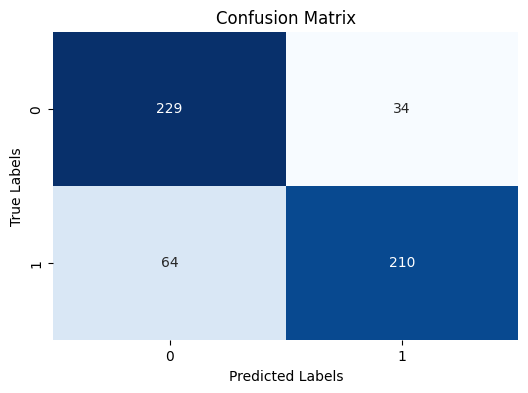

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       263
           1       0.86      0.77      0.81       274

    accuracy                           0.82       537
   macro avg       0.82      0.82      0.82       537
weighted avg       0.82      0.82      0.82       537



In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_scaled ,y_train)

# Predict labels for the test set
y_pred = svm.predict(X_test_scaled)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Best CV params: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV accuracy: 0.8587346613545817
Test accuracy of best grid search hypers: 0.8230912476722533
Train accuracy: 0.8667198723064645
Test accuracy: 0.8230912476722533


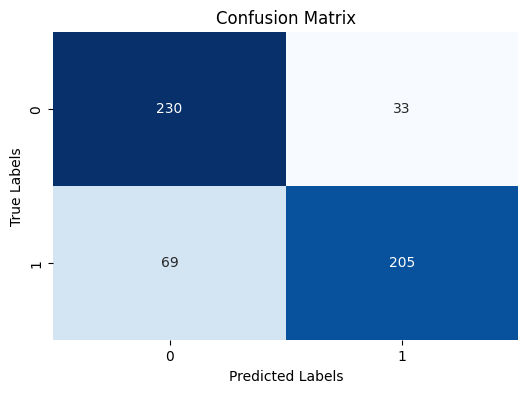

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       263
           1       0.86      0.75      0.80       274

    accuracy                           0.81       537
   macro avg       0.82      0.81      0.81       537
weighted avg       0.82      0.81      0.81       537



In [ ]:
svm_tuned = SVC()
parameters = {
    'C': [0.1, 1, 10, 100],
    'gamma': [ 0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf']
}

searcher = GridSearchCV(svm_tuned, parameters, n_jobs=-1)
searcher.fit(X_train_scaled, y_train)

print("Best CV params:", searcher.best_params_)
print("Best CV accuracy:", searcher.best_score_)

best_svm = searcher.best_estimator_
test_accuracy = best_svm.score(X_test_scaled, y_test)
print("Test accuracy of best grid search hypers:", test_accuracy)

# Predict labels for the test set
y_pred = grid_search.predict(X_test_scaled)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


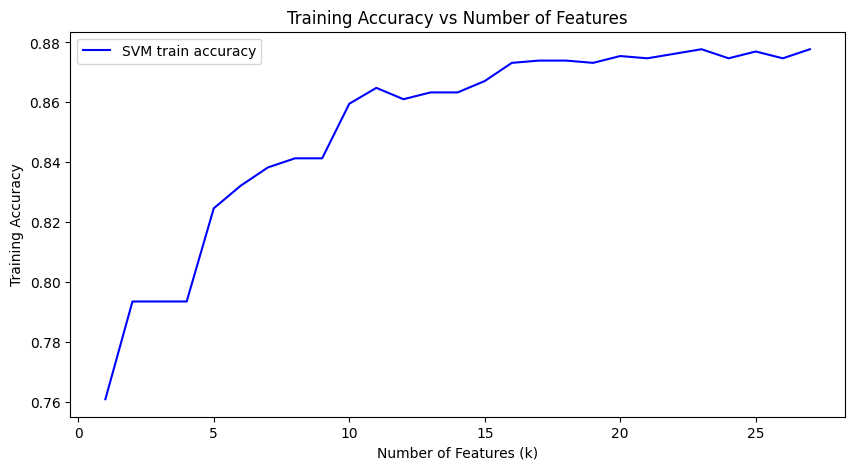

In [ ]:
svm_FS = SVC(C=100, gamma=0.001, kernel='rbf')

k_range = np.arange(1, 28, 1)

accuracy_list_train_svm = []
for kk in k_range:
    selector = SelectKBest(f_classif, k=kk)
    X_train_new = selector.fit_transform(X_train_scaled, y_train)

    svm_FS.fit(X_train_new, y_train)
    accuracy_list_train_svm.append(svm_FS.score(X_train_new, y_train))

plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracy_list_train_svm, color="blue", label="SVM train accuracy")
plt.xlabel("Number of Features (k)")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Number of Features")
plt.legend()
plt.show()

In [ ]:
d = {'best features number': kk, 'train_score': accuracy_list_train_svm}
df = pd.DataFrame(data=d)
print("max accuracy:",df["train_score"].max())
print("max accuracy id:",df["train_score"].idxmax())

max accuracy: 0.8777524677296887
max accuracy id: 22


In [ ]:
selector_svm = SelectKBest(f_classif, k =22)
X_new_svm = selector_svm.fit_transform(X_train_scaled, y_train)
X_new_test_svm=selector_svm.fit_transform(X_test_scaled,y_test)
svmm=SVC(C=100, gamma=0.001, kernel='rbf')
svmm.fit(X_new_svm ,y_train)
print("train accuracy:",svmm.score(X_new_svm,y_train))
print("test accuracy:",svmm.score(X_new_test_svm,y_test))

train accuracy: 0.8762338648443432
test accuracy: 0.8460176991150442


# **Logistic Regression**

Train accuracy: 0.8667198723064645
Test accuracy: 0.8230912476722533


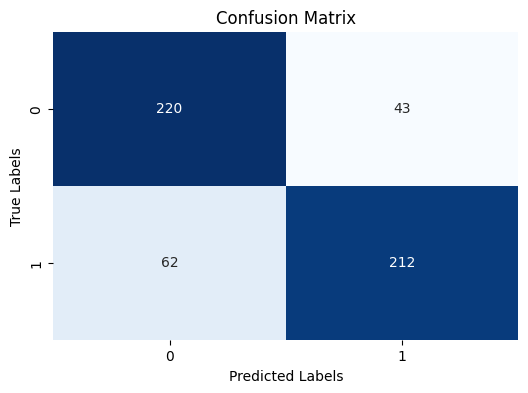

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       263
           1       0.83      0.77      0.80       274

    accuracy                           0.80       537
   macro avg       0.81      0.81      0.80       537
weighted avg       0.81      0.80      0.80       537



In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled ,y_train)

y_pred = log_reg.predict(X_test_scaled)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Best CV params: {'C': 0.01, 'solver': 'newton-cg'}
Best CV accuracy: 0.8603314741035856
Test accuracy of best grid search hypers: 0.8305400372439479
Train accuracy: 0.8667198723064645
Test accuracy: 0.8305400372439479


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


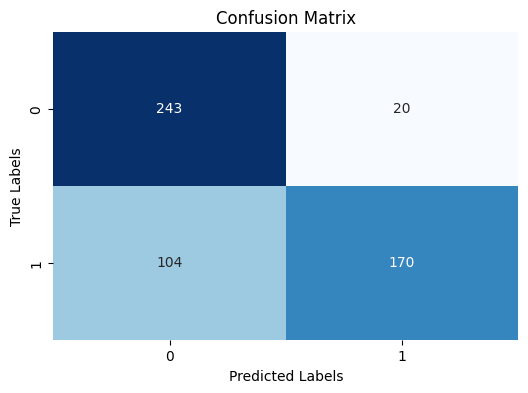

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.92      0.80       263
           1       0.89      0.62      0.73       274

    accuracy                           0.77       537
   macro avg       0.80      0.77      0.76       537
weighted avg       0.80      0.77      0.76       537



In [ ]:
log_reg_tuned = LogisticRegression()

parameters = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'liblinear']
}

searcher = GridSearchCV(log_reg_tuned, parameters, cv=5)
searcher.fit(X_train, y_train)

print("Best CV params:", searcher.best_params_)
print("Best CV accuracy:", searcher.best_score_)

best_log_reg = searcher.best_estimator_
test_accuracy = best_log_reg.score(X_test, y_test)
print("Test accuracy of best grid search hypers:", test_accuracy)

# Predict labels for the test set
y_pred = searcher.predict(X_test_scaled)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


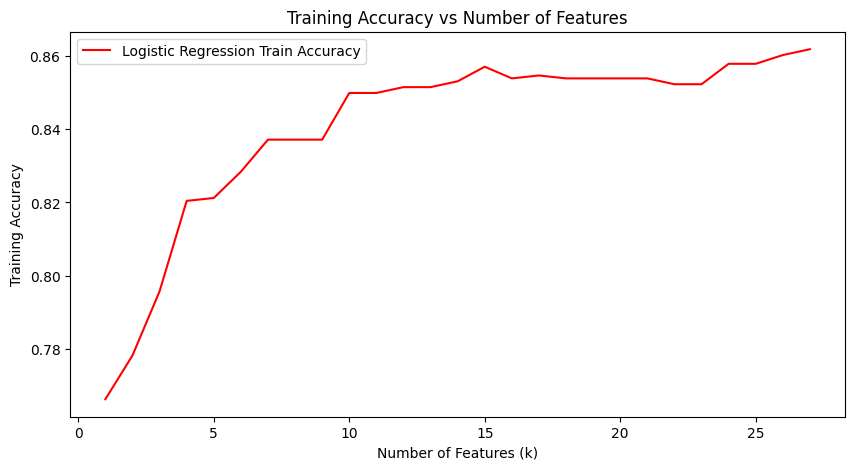

In [ ]:
log_reg_FS = LogisticRegression(C=0.01, solver='newton-cg')

k_range = np.arange(1, 28, 1)

accuracy_list_train_log_reg = []

for kk in k_range:

    selector = SelectKBest(f_classif, k=kk)
    X_train_new = selector.fit_transform(X_train_scaled, y_train)

    log_reg_FS.fit(X_train_new, y_train)
    accuracy_list_train_log_reg.append(log_reg_FS.score(X_train_new, y_train))

plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracy_list_train_log_reg, color="red", label="Logistic Regression Train Accuracy")
plt.xlabel("Number of Features (k)")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Number of Features")
plt.legend()
plt.show()


In [ ]:
d = {'best features number': kk, 'train_score': accuracy_list_train_log_reg}
df = pd.DataFrame(data=d)
print("max accuracy:",df["train_score"].max())
print("max accuracy id:",df["train_score"].idxmax())

max accuracy: 0.8619313647246608
max accuracy id: 26


In [ ]:
selector_lgrmodel = SelectKBest(f_classif, k =26)
X_new_lgrmodel = selector_lgrmodel.fit_transform(X_train_scaled, y_train)
X_new_test_lgrmodel=selector_lgrmodel.fit_transform(X_test_scaled,y_test)
log_regg = LogisticRegression(C=0.01, solver='newton-cg')
log_regg.fit(X_new_lgrmodel , y_train)
print("train accuracy:",log_regg.score(X_new_lgrmodel,y_train))
print("test accuracy:",log_regg.score(X_new_test_lgrmodel,y_test))

train accuracy: 0.8603351955307262
test accuracy: 0.8100558659217877


# **Ensemble Model**

In [ ]:

trained_models = {
    'Logistic Regression': log_reg,
    'KNN': knn,
    'SVM': svm,
    'Random Forest': rf
}

# Track the best model's name and score
best_model_name = ""
best_score = 0

for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{name} - Accuracy: {accuracy:.2f}")

    if accuracy > best_score:
        best_score = accuracy
        best_model_name = name

print(f"\nBest Model on Test Set: {best_model_name} with Accuracy: {best_score:.2f}")

Logistic Regression - Accuracy: 0.74
KNN - Accuracy: 0.75
SVM - Accuracy: 0.75
Random Forest - Accuracy: 0.81

Best Model on Test Set: Random Forest with Accuracy: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
